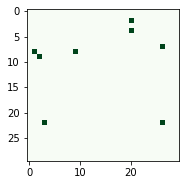

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [3]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

# def photosynthesize(plants, carbon_dioxide_map, world):


world_params = { 'world_size': 30, 'global_creature_id_counter': 0 }

world = np.zeros(shape=(world_params['world_size'], world_params['world_size']))

carbon_dioxide_map = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

plants = sc.spawn_new_plants(world_size=world_params['world_size'],
                             num_plants=7,
                             global_creature_id_counter=world_params['global_creature_id_counter'])

# photosynthesize(plants, carbon_dioxide_map, world)

creature_render.place_creatures(plants, world)

ar.render_array(world)

world